### A little setup to start
****

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format ### default decimal precision
### follow ensures that all columns and rows are displayed
pd.set_option('display.max_columns', None) ### pd.reset_option('max_columns') ### to reset
pd.set_option('display.max_rows', None) ### pd.reset_option('max_rows') ### to reset
# import seaborn as sns
import plotly.express as px

<br>

#### Data comes from the USGS

***

In [2]:
data = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv')

<br>

#### Let's see what we've got, here

***

In [3]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9859 entries, 0 to 9858
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9859 non-null   object 
 1   latitude         9859 non-null   float64
 2   longitude        9859 non-null   float64
 3   depth            9859 non-null   float64
 4   mag              9859 non-null   float64
 5   magType          9859 non-null   object 
 6   nst              7667 non-null   float64
 7   gap              7667 non-null   float64
 8   dmin             6106 non-null   float64
 9   rms              9859 non-null   float64
 10  net              9859 non-null   object 
 11  id               9859 non-null   object 
 12  updated          9859 non-null   object 
 13  place            9859 non-null   object 
 14  type             9859 non-null   object 
 15  horizontalError  7096 non-null   float64
 16  depthError       9859 non-null   float64
 17  magError      

In [4]:
### Let's see what's registered in or around Guam, greater than 4.5 magnitude ###
data[ (np.abs(data['mag']) > 4.5) & (data['place'].str.contains('Guam'))].head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
1936,2023-11-11T00:17:37.151Z,12.499,143.296,19.007,4.600,mb,69.000,85.000,1.877,0.470,us,us7000la9f,2023-11-19T01:25:00.040Z,"171 km WSW of Merizo Village, Guam",earthquake,10.420,5.163,0.069,62.000,reviewed,us,us
7534,2023-10-26T03:43:14.332Z,12.516,142.084,97.837,4.600,mb,45.000,53.000,16.961,0.500,us,us7000l7v3,2023-11-17T22:45:39.040Z,"292 km WSW of Merizo Village, Guam",earthquake,13.790,6.577,0.098,32.000,reviewed,us,us


<br>

#### Let's do a little data cleaning

***

In [5]:
data = data.dropna(subset=['mag']) ### remove events without a registered magnitude
data = data[data['mag'] > 0] ### remove events with a zero magnitude
### FYI - according to USGS magnitudes less than zero do actuall exist
### (b/c scale is logarithmic) but these are too weak to be detected by humans

<br>

#### So let's get to plottin...

***

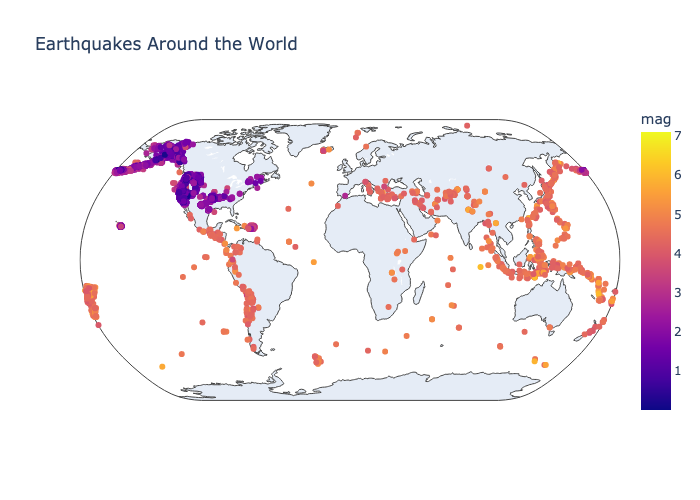

In [6]:
fig = px.scatter_geo(data, lat='latitude', lon='longitude', color='mag',
                     hover_name='place', #size='mag',
                     height= 500, width= 700, title='Earthquakes Around the World',
                     projection='natural earth'
                    )
fig.show('png')
### FYI - Plotly creates fantastic visuals with hover, zoom, pan, etc,
### howver, they don't always "play nice" with github. With this in mind,
### it's reproduced here as a .png.